# Local Outlier Factor (LOF)

The **Local Outlier Factor (LOF)** is an unsupervised anomaly detection algorithm that identifies data points that are significantly different from their neighbors. It is particularly useful for detecting outliers in datasets with varying densities.

## How LOF Works

- **Local Density:** LOF measures the local density deviation of a given data point with respect to its neighbors.
- **k-Nearest Neighbors:** For each point, LOF computes the distance to its *k* nearest neighbors.
- **Outlier Score:** Points that have a substantially lower density than their neighbors are considered outliers. The LOF score quantifies how isolated a point is compared to its surroundings.

## Interpretation

- **LOF ≈ 1:** The point has a density similar to its neighbors (inlier).
- **LOF > 1:** The point is in a region of lower density than its neighbors (potential outlier).
- **Higher LOF:** Indicates a stronger outlier.

## Applications

- Fraud detection
- Intrusion detection
- Fault detection
- Any scenario where identifying rare or abnormal data points is important

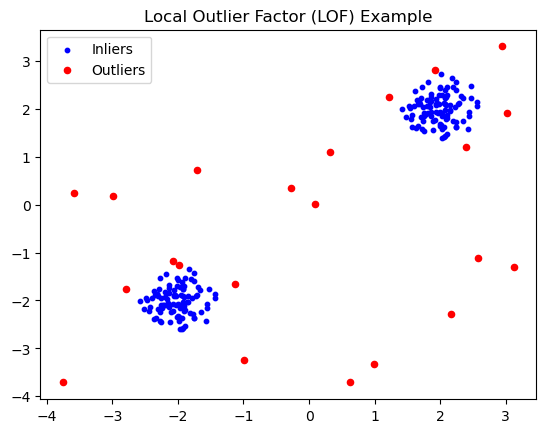

In [11]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

# Fit the model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)
outliers = y_pred == -1

# Plot results
plt.scatter(X[:, 0], X[:, 1], color='b', s=10, label='Inliers')
plt.scatter(X[outliers, 0], X[outliers, 1], color='r', s=20, label='Outliers')
plt.legend()
plt.title("Local Outlier Factor (LOF) Example")
plt.show()

C:\Users\U S\AppData\Local\Temp\ipykernel_16492\821629440.py:22: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='red', edgecolor='k', s=100, label='Outliers', marker='x')


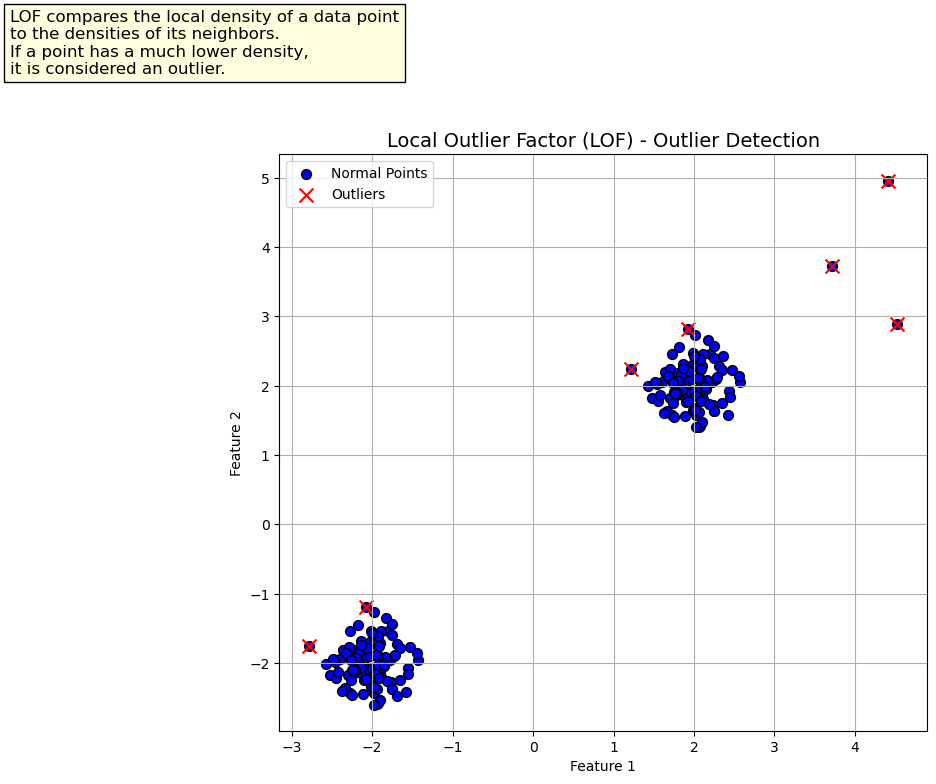

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic data
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Add outliers
X_outliers = np.random.uniform(low=-6, high=6, size=(5, 2))
X = np.r_[X_inliers, X_outliers]

# Fit LOF model
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)
outlier_scores = -lof.negative_outlier_factor_

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50, label='Normal Points')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='red', edgecolor='k', s=100, label='Outliers', marker='x')

# Annotate explanation
plt.text(-6.5, 6.5,
         "LOF compares the local density of a data point\n"
         "to the densities of its neighbors.\n"
         "If a point has a much lower density,\n"
         "it is considered an outlier.",
         fontsize=12, bbox=dict(facecolor='lightyellow', edgecolor='black'))

plt.title("Local Outlier Factor (LOF) - Outlier Detection", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
